# Project: Investigate a Dataset - Analyze TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
# Import the neccessary packages
import pandas as pd
import matplotlib as plt
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### DataSet chosen for analysis: TMDb Movie Data

The database contains information about movies collected from The Movies Database, including revenue, budget, ratings, and homepage. I displayed 10 rows to get a little more detailed result about the columns, values and structure. I decided to ask questions related financials, popularity and genres.

#### Questions posed:

1. How has the popularity of Western movies changed over the years?
2. Does budget correlate with popularity? What about the movies with the biggest budget?
3. Which 10 production company profited the most over the years?

In [2]:
# Load the data to check the structure and columns
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### The Data Structure

Before working with the data I checked the databese and looked for missing values, inconsistency or inadequate datatype. After getting more information and find out the questions I wanted to pose, I cleaned the database. There were unecessary columns with missing data, inadequate datatypes and rows with 0 value. The columns 'genres' and 'production_companies' contained multiple value that does no meet the requirements of first normal form.


### The Cleaning Process

- I removed  the columns cast, homepage, tagline, keywords, overview and imdb id to improve database performance.         
- The column 'genres' and 'productions_companies' were not in the first normal form which requires that in the table should not have multiple value in the same row of data. I was unable to create a second joined column, so I decided to remove the values after the first '|' sign to get better groupping and cleaner visualization in the further analysis.
- I casted release_date from string to date datatype.
- I converted the columns revenue, budget, revenue_adj and budget_adj from float to int.
- The 0 values would distort the result of forther calculations so I replaced the 0 in revenue, budget, revenue_adj and budget_adj with means.
- I also replaced the Na values with 'Unknown' to improve interpretation.

In [3]:
# Get info about the database to check missing values and data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

I converted the values to the proper data types.

In [4]:
# Convert release_date (object datatype) to date.

df['release_date'] = pd.to_datetime(df['release_date'])

# Convert budget_adj and revenue_adj from float to int.

df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

# convert budget and revenue from float to int.

df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)

I removed some columns to improve readability and performance.

In [5]:
# Drop the unnecessary columns

df = df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id'], axis=1)

Doublecheck my results.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null int64
revenue_adj             10866 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(8), object(4)
memory usage: 1.2+ MB


In [7]:
# Replace the null values in the columns with 'unknown'

df['director'] = df['director'].fillna('Unknown')
df['production_companies'] = df['production_companies'].fillna('Unknown')
df['genres'] = df['genres'].fillna('Unknown')

In [8]:
# Check the results

df.query('director == "Unknown"').head(20)
df.query('production_companies == "Unknown"').head(20)
df.query('genres == "Unknown"').head(20)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,0,0,Belli di papÃ,Guido Chiesa,100,Unknown,Unknown,2015-10-29,21,6.1,2015,0,0
620,361043,0.129696,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,Unknown,Ruthless Pictures|Hollywood Shorts,2015-10-06,13,5.0,2015,0,0
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,Unknown,Unknown,2014-10-03,13,6.8,2014,0,0
1712,21634,0.302095,0,0,Prayers for Bobby,Russell Mulcahy,88,Unknown,Daniel Sladek Entertainment,2009-02-27,57,7.4,2009,0,0
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,Unknown,Unknown,2009-02-27,11,7.0,2009,0,0
2370,127717,0.081892,0,0,Freshman Father,Michael Scott,0,Unknown,Unknown,2010-06-05,12,5.8,2010,0,0
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,Unknown,62,Unknown,Unknown,2010-12-25,11,7.7,2010,0,0
2853,57892,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan,110,Unknown,Unknown,2001-02-02,12,7.2,2001,0,0
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,96,Unknown,Unknown,2008-08-13,11,6.1,2008,0,0
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,220,Unknown,BBC,2012-07-27,12,8.3,2012,0,0


I deleted some data from the rows with multiple values.

In [9]:
# df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0])

In [11]:
# Check changes
df['production_companies'].head(15)

0                          Universal Studios
1                  Village Roadshow Pictures
2                       Summit Entertainment
3                                  Lucasfilm
4                         Universal Pictures
5                        Regency Enterprises
6                         Paramount Pictures
7     Twentieth Century Fox Film Corporation
8                         Universal Pictures
9                       Walt Disney Pictures
10                         Columbia Pictures
11                 Village Roadshow Pictures
12                                 DNA Films
13                         Columbia Pictures
14                            Marvel Studios
Name: production_companies, dtype: object

I replace 0 values with means in columns budget_adj and revenue_ad, budget and revenue.

In [12]:
df['budget']=df['budget'].replace(0,df['budget'].mean())

df['revenue']=df['revenue'].replace(0,df['revenue'].mean())

df['budget_adj']=df['budget_adj'].replace(0,df['budget_adj'].mean())

df['revenue_adj']=df['revenue_adj'].replace(0,df['revenue_adj'].mean())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null float64
revenue                 10866 non-null float64
original_title          10866 non-null object
director                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

I recently read an article about the evolution of Western movies. It mentioned that the most prolific era was in the 1930s to the 1960s and the genre almost vanished in the 1980s. Tthere were little sign of resurgence after the 1990s but Western has not got back its popularity yet. As I am a big fan of the genre, I decided to analyze its populatiry over the decades and test the assumptions on the data. However, I use the article only as an interesting starting point - I do not intend to draw far-reaching conclusions.

### 1. Have changed the popularity of Western movies over the decades?

At first, I created a smaller dataframe which contained movies where in the column 'genre' appeared the word 'Western'. I decided to get every Western influenced or Western styled movie, I did not want to define the conditions too strict to get a bigger dataframe. I also planned to analyze the popularity by decades, not by release_year.

In [14]:
# Create dataframe to every movie with the genre 'Western'

df_western = df[df['genres'].str.contains("Western")]

To check the results I simply counted the records in the dataframe, the records with genre 'Western', and compared the numbers. I got True, so the two values are the same.

In [16]:
# Check the results by comparing the calculations.

df_western.genres.str.contains(r'Western').sum() == df_western['id'].count()

True

Mapping the release years to decades.

In [17]:
# Create bin edges to decades
decades = [1960, 1970, 1980, 1990, 2000, 2010, 2020]

# Create labels 
decade_names = ['1960', '1970', '1980', '1990', '2000', '2010']

# Create new column and cut into bins
df_western['release_decade'] = pd.cut(df['release_year'], decades, labels=decade_names)

df_western.head()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_decade
5,281957,9.110700,1.350000e+08,5.329505e+08,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,2010
15,273248,5.898400,4.400000e+07,1.557601e+08,The Hateful Eight,Quentin Tarantino,167,Crime|Drama|Mystery|Western,Double Feature Films,2015-12-25,2389,7.4,2015,4.047998e+07,1.432992e+08,2010
125,223485,1.329702,1.462570e+07,2.290940e+05,Slow West,John Maclean,84,Romance|Thriller|Western,The New Zealand Film Commission,2015-04-16,229,6.6,2015,1.755104e+07,2.107660e+05,2010
145,294963,1.073349,1.800000e+06,3.982332e+07,Bone Tomahawk,S. Craig Zahler,132,Horror|Western|Adventure|Drama,Caliber Media Company,2015-10-23,220,6.3,2015,1.655999e+06,5.136436e+07,2010
165,347969,0.913085,6.000000e+07,3.982332e+07,The Ridiculous 6,Frank Coraci,119,Comedy|Western,Happy Madison Productions,2015-12-11,252,4.8,2015,5.519998e+07,5.136436e+07,2010


In [18]:
# Check if western movies are available in every decade and count their number

df_western.groupby(['release_decade'], as_index = False)['id'].count()

,release_decade,id
0,1960,38
1,1970,33
2,1980,12
3,1990,24
4,2000,30
5,2010,22


In [19]:
# Get the average popularity by decades

df_western.groupby(['release_decade'], as_index = False)['popularity'].mean()

,release_decade,popularity
0,1960,0.301672
1,1970,0.315369
2,1980,0.429861
3,1990,0.544739
4,2000,0.612382
5,2010,1.616852


In [20]:
# Get the mean of vote_average in every decade

df_1960 = df_western.query('release_decade == "1960"')
df_1960_mean = df_1960['popularity'].mean()

df_1970 = df_western.query('release_decade == "1970"')
df_1970_mean = df_1970['popularity'].mean()

df_1980 = df_western.query('release_decade == "1980"')
df_1980_mean = df_1980['popularity'].mean()

df_1990 = df_western.query('release_decade == "1990"')
df_1990_mean = df_1990['popularity'].mean()

df_2000 = df_western.query('release_decade == "2000"')
df_2000_mean = df_2000['popularity'].mean()

df_2010 = df_western.query('release_decade == "2010"')
df_2010_mean = df_2010['popularity'].mean()

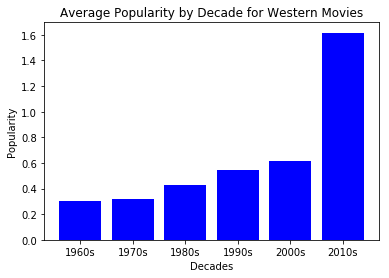

In [21]:
# labels_decades = ("60's", "70's", "80's", "90's", "2000's", "2010's")

# df_western_avg_votes.plot(tick_label = labels_decades, kind = 'bar', title ='Average Votes by Decade')

# createa bar chart with labels

locations = [1, 2, 3, 4, 5, 6]
heights = [df_1960_mean, df_1970_mean, df_1980_mean, df_1990_mean, df_2000_mean, df_2010_mean]
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(locations, heights, tick_label=labels, color = 'b', )
plt.title('Average Popularity by Decade for Western Movies')
plt.xlabel('Decades')
plt.ylabel('Popularity');

As we can see, the popularity has steadly grew over the years which does not meet our expectations. But during the calculations I found something else that can confirm the assumptions, so I created another chart to visualize the popularity of the genre. In this case, I simply display the number of released Western movies. 

Sum of Released Movies: 
  release_decade  id
0           1960  38
1           1970  33
2           1980  12
3           1990  24
4           2000  30
5           2010  22


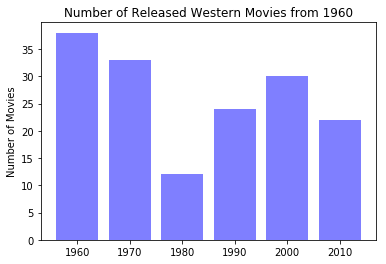

In [22]:
df_west_sum = df_western.groupby(['release_decade'], as_index = False)['id'].count()

years = ('1960', '1970', '1980', '1990', '2000', '2010')
pos = np.arange(0, 6, 1)
plt.xticks(pos, years)
bar_heights = df_west_sum['id']

print('Sum of Released Movies: ')
print(df_west_sum)

dc_bars = plt.bar(x = years, color='b', alpha=.5, height = bar_heights)

plt.ylabel('Number of Movies')
plt.title('Number of Released Western Movies from 1960')

plt.legend()
plt.show()

According to the chart, the number of Western movies slide started to slide steeply after the '70s and reached the bottom in the '80s. If we measured the evolution and popularity of Western by the number of released movies, the results would meet our assumptions but I would not like to imply causation based on my results.

## 2. Ratings for the Cheapest and Most Expensive Movies

I was curious about if there are any measurable difference between votes of the most and the least expensive movies. I decided to get information about the most and least expensive films and viualize the distribution of their votes in one histogram.

### Part 1: Get the most expensive movies

At first, I sorted the movies by budget to get the 200 most expensive movies from the database.

In [25]:
# Sort movies by budget in descending order

sorted_budget_biggest = df.sort_values(by=['budget_adj'], ascending = False).head(200)

I got the most expensive movies and their ratings.

In [29]:
# Get the most expensive movies with ratings

sorted_budget_biggest.groupby('original_title')['vote_average'].mean()

original_title
2012                                   5.6
47 Ronin                               5.8
A Bug's Life                           6.6
A Christmas Carol                      6.6
Alexander                              5.6
Alice in Wonderland                    6.3
Angels & Demons                        6.3
Armageddon                             6.4
Atlantis: The Lost Empire              6.5
Avatar                                 7.1
Avengers: Age of Ultron                7.4
Bad Boys II                            6.3
Batman & Robin                         4.4
Batman Begins                          7.3
Batman Forever                         5.2
Battleship                             5.5
Bee Movie                              5.6
Big Hero 6                             7.8
Bolt                                   6.3
Brave                                  6.6
Captain America: The Winter Soldier    7.6
Cars 2                                 5.8
Casino Royale                          

In [44]:
# Save the results to a variable.

exp_budget_vote = sorted_budget_biggest.groupby(['original_title'])['vote_average'].mean()

I created a hitogram to get a picture about the distribution.

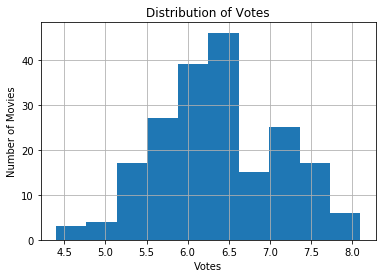

In [33]:
# Create a plot to visualize the results

plt.xlabel('Votes')
plt.ylabel('Number of Movies')
plt.title('Distribution of Votes')

exp_budget_vote.hist(histtype = 'stepfilled', label = 'Rates of the Most Expensive Movies')

### Part 2: get the cheapest movies

I queried the 200 cheapest movies from the database.

In [38]:
# Get the cheapest movies with ratings
 
sorted_budget_cheapest = df.sort_values(by=['budget_adj'], ascending = True).head(200)

I queried the cheapest movies and their rating.

In [46]:
cheap_budget_vote = sorted_budget_cheapest.groupby('original_title')['vote_average'].mean()

I created a histogram to visualize the distribuion.

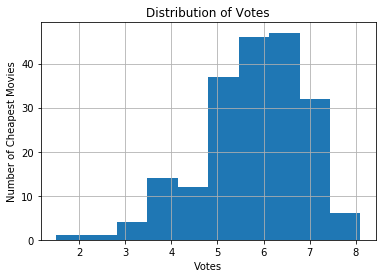

In [48]:
plt.xlabel('Votes')
plt.ylabel('Number of Cheapest Movies')
plt.title('Distribution of Votes')

cheap_budget_vote.hist(label = 'Rates of the Cheapest Movies')

### Part 3: Compare the results in one diagram

I created a diagram to display the differences between the ratings.

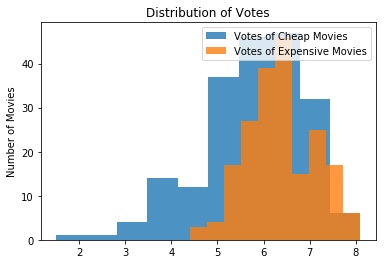

In [50]:
plt.hist(cheap_budget_vote, alpha=0.8, label='Votes of Cheap Movies')
plt.hist(exp_budget_vote, alpha=0.8, label='Votes of Expensive Movies')
plt.ylabel('Number of Movies')
plt.title('Distribution of Votes')
plt.legend(loc='upper right')
plt.show()

### Part 4: Conclusion

As a conclusion, I can say that the most expensive movies generally got better rating that the cheaper ones. We can see on the diagram that the worst rating is 4.5 while the cheapest movies worst rating were lower than 2.

<a id='conclusions'></a>
## Conclusions

In the first section I examined the popularity of Western movies over the decades. I made my analyzation based on the values of 'released_year' and 'popularity'. I could not find any correlations between the numbers and the assumptions but I found it by taking into account the numbers of released movies.

After that I analyzed the ratings of the most and least expensive movies and I found out that the more expensive movies got higher votes than the cheaper ones.

### Limitations

In the first section - although the literature details the phenomenon - I could not find any correlation between 'popularty' and 'release year'. It would be good to know more about what is behind the value 'popularity' and what popularity means here. Just to name a few... How was it calculated? Which criterias and values were measured exactly to get these numbers? It could be caculated based on ticket sales? Or based on audience appraisal? However, I found correlation between my assumptions and the number of released western movies but I would not name it causation without a much more detailed further analysis. 

In the second section, I made my calculations based on the values of budget adjustment to take the fluctuations into account, I found this really useful. But there were more missing values in the 'budget_adj' column. During the cleaning process I replaced the missing values with the average, but it still can distort the result (for instance, there would be other movies among the most expensive 200 movies).

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-Copy1.ipynb'])

0